In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch
import torch.nn.functional as F

In [10]:
path = '/kaggle/input/affectnetsample'

classes = os.listdir(path + '/train_class')
classes

['class001',
 'class005',
 'class008',
 'class004',
 'class006',
 'class003',
 'class002',
 'class007']

image0000305.jpg
image0032600.jpg
image0014242.jpg
image0032239.jpg
image0041875.jpg
image0019735.jpg
image0010316.jpg
image0004341.jpg
[47 34 42]


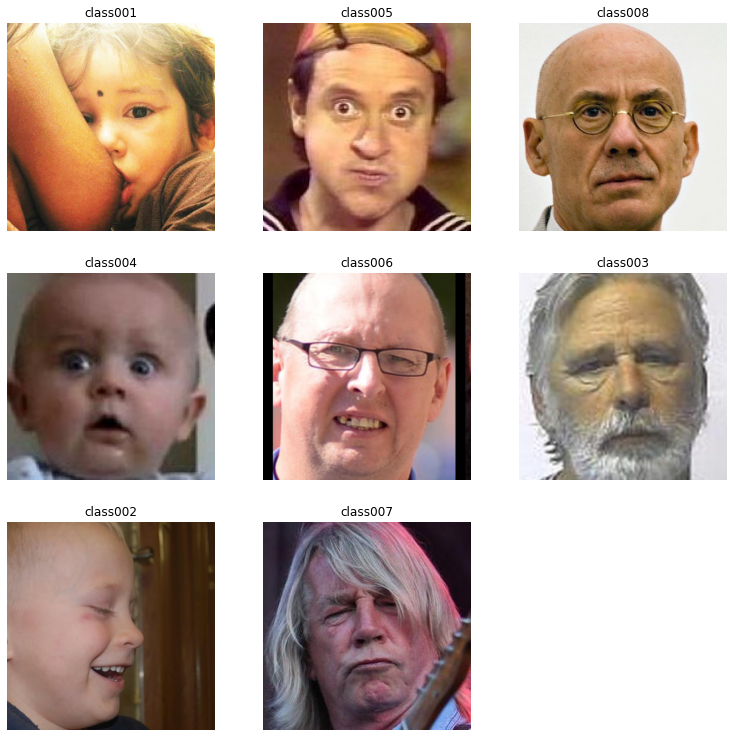

In [15]:
import random
def display_image(image, title, subplot):
    new_img = np.zeros_like(image)
    new_img[:, :, 0], new_img[:, :, 1], new_img[:, :, 2] = image[:, :, 2], image[:, :, 1], image[:, :, 0]
    # image[:, :, 0], image[:, :, 1], image[:, :, 2] = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(new_img)
    plt.title(title)
subplot = 331
plt.figure(figsize=(13,13))
for i in range(len(classes)):
    file = random.choice(os.listdir(f'{path}/train_class/{classes[i]}'))
    print(file)
    image = cv2.imread(f'{path}/train_class/{classes[i]}/{file}')# .astype(np.float32)
    # print(image)
    display_image(image, classes[i], subplot+i)
print(image[0, 0, :])

In [16]:
weight_enum = torch.hub.load("pytorch/vision", "get_model_weights", name="resnet18")
print([weight for weight in weight_enum])

Downloading: "https://github.com/pytorch/vision/archive/main.zip" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/pytorch_vision_main/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


[ResNet18_Weights.IMAGENET1K_V1]


In [17]:
from torchvision import transforms
train_transform = transforms.Compose(
    [transforms.Resize(size=(224, 224)),
     transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

val_transform = transforms.Compose(
    [transforms.Resize(size=(224, 224)),
     transforms.ToTensor(),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)
transform_dict = {
    'train' : train_transform,
    'test': val_transform
}

In [22]:
# from torchvision import datasets
# def load_data(path, batch_size, train_ratio):
#     # all_datasets = []
#     data = datasets.ImageFolder(f'{path}/{mode}_class', transform=transform_dict[mode])
#     train, test = torch.utils.data.random_split(data, (int(len(data) * train_ratio), len(data) - int(len(data) * train_ratio)))
#         # datasets.append(data)
#     # data = torch.utils.data.ConcatDataset(all_datasets)
#     train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=4)
#     test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=4)
#     return train, train_loader, test, test_loader

# train_data, train_loader, test_data, test_loader = load_data(path, 4, 0.8)
# train_data[0]
from torchvision import datasets
def load_data(path, batch_size, mode):
    # all_datasets = []
    data = datasets.ImageFolder(f'{path}/{mode if mode=="train" else "val"}_class', transform=transform_dict[mode])
        # datasets.append(data)
    # data = torch.utils.data.ConcatDataset(all_datasets)
    data_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True, drop_last=False, num_workers=4)
    return data, data_loader

train_data, train_loader = load_data(path, 8, 'train')
test_data, test_loader = load_data(path, 8, 'test')
train_data[0]

(tensor([[[0.5451, 0.5412, 0.5412,  ..., 0.0157, 0.0275, 0.0510],
          [0.5333, 0.5294, 0.5294,  ..., 0.0157, 0.0235, 0.0471],
          [0.5255, 0.5255, 0.5255,  ..., 0.0157, 0.0235, 0.0392],
          ...,
          [0.0471, 0.0627, 0.0824,  ..., 0.1451, 0.1451, 0.1490],
          [0.0510, 0.0627, 0.0706,  ..., 0.1451, 0.1451, 0.1451],
          [0.0549, 0.0588, 0.0510,  ..., 0.1490, 0.1490, 0.1451]],
 
         [[0.4863, 0.4824, 0.4784,  ..., 0.0157, 0.0353, 0.0745],
          [0.4745, 0.4706, 0.4706,  ..., 0.0157, 0.0314, 0.0706],
          [0.4667, 0.4667, 0.4667,  ..., 0.0157, 0.0275, 0.0627],
          ...,
          [0.1922, 0.2118, 0.2235,  ..., 0.1490, 0.1490, 0.1451],
          [0.2118, 0.2235, 0.2275,  ..., 0.1490, 0.1451, 0.1412],
          [0.2314, 0.2353, 0.2275,  ..., 0.1451, 0.1451, 0.1412]],
 
         [[0.4667, 0.4627, 0.4627,  ..., 0.0235, 0.0392, 0.0745],
          [0.4549, 0.4510, 0.4510,  ..., 0.0235, 0.0353, 0.0706],
          [0.4471, 0.4471, 0.4471,  ...,

In [24]:
train_data.__len__()

37553

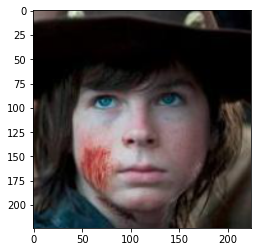

In [23]:
plt.imshow(train_data[0][0].permute(1, 2, 0))

tensor([2, 7, 7, 3, 1, 1, 3, 1])
torch.Size([3, 224, 224])


Text(0.5, 1.0, 'class008')

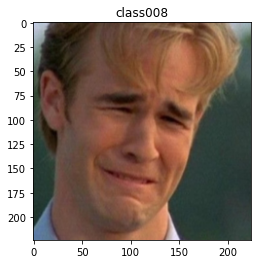

In [25]:
batch, y = next(iter(train_loader))
print(y)
print(batch[0].shape)
plt.imshow(batch[0].permute(1, 2, 0))
plt.title(classes[y[0]])

In [26]:
import time
import copy
from tqdm import tqdm
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25, is_inception=False):
    since = time.time()
    val_acc_history = []
    best_model_weights = copy.deepcopy(model.state_dict())
    best_acc = 0.
    
    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs-1}')
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()
            else:
                model.eval()
            
            running_loss = 0.0
            running_corrects = 0
            
            for inputs, labels in tqdm(dataloaders[phase]):
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                with torch.set_grad_enabled(phase == 'train'):
                    
                    if is_inception and phase == 'train':
                        outputs, aux_outputs = model(inputs)
                        loss1 = criterion(outputs, labels)
                        loss2 = criterion(aux_outputs, labels)
                        
                        loss = loss1 + 0.4*loss2
                    else:
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
            print(f'{phase} loss: {epoch_loss} acc: {epoch_acc}')
                
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_weights = copy.deepcopy(model.state_dict())
            
            if phase == 'test':
                val_acc_history.append(epoch_acc)
        
        print()
        
    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60}m {time_elapsed % 60}s ')
    print(f'Best eval acc: {best_acc:.4f}')
    
    model.load_state_dict(best_model_weights)
    torch.save(model.state_dict(), f'/kaggle/working/emotion_model2_{best_acc:.4f}.txt')
    return model, val_acc_history

In [27]:
def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for p in model.parameters():
            p.requires_grad = False

In [34]:
model = torch.hub.load("pytorch/vision", "resnet18", weights='IMAGENET1K_V1')

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


In [35]:
set_parameter_requires_grad(model, True)
# print(model.layer4)
for name, p in list(model.layer4.named_parameters()):
    print(name)
    p.requires_grad = True
model.fc = torch.nn.Linear(512, len(classes))

0.conv1.weight
0.bn1.weight
0.bn1.bias
0.conv2.weight
0.bn2.weight
0.bn2.bias
0.downsample.0.weight
0.downsample.1.weight
0.downsample.1.bias
1.conv1.weight
1.bn1.weight
1.bn1.bias
1.conv2.weight
1.bn2.weight
1.bn2.bias


In [36]:
dataloaders_dict = {'train': train_loader, 'test': test_loader}


In [37]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [38]:
model = model.to(device)

print('Params to learn:')
params_to_update = []
for name, param in model.named_parameters():
    # print('\t', name)
    if param.requires_grad:
        params_to_update.append(param)
        print('\t', name)
        
optimizer = torch.optim.AdamW(params_to_update, lr=0.001)

Params to learn:
	 layer4.0.conv1.weight
	 layer4.0.bn1.weight
	 layer4.0.bn1.bias
	 layer4.0.conv2.weight
	 layer4.0.bn2.weight
	 layer4.0.bn2.bias
	 layer4.0.downsample.0.weight
	 layer4.0.downsample.1.weight
	 layer4.0.downsample.1.bias
	 layer4.1.conv1.weight
	 layer4.1.bn1.weight
	 layer4.1.bn1.bias
	 layer4.1.conv2.weight
	 layer4.1.bn2.weight
	 layer4.1.bn2.bias
	 fc.weight
	 fc.bias


In [41]:
criterion = torch.nn.CrossEntropyLoss()
model, hist = train_model(model, dataloaders_dict, criterion, optimizer, num_epochs=4, is_inception=False)

Epoch 0/3
----------


100%|██████████| 4695/4695 [06:26<00:00, 12.14it/s]


train loss: 1.5446939378039573 acc: 0.42246957633211724


100%|██████████| 500/500 [00:42<00:00, 11.70it/s]


test loss: 1.4413151679039002 acc: 0.461

Epoch 1/3
----------


100%|██████████| 4695/4695 [06:25<00:00, 12.19it/s]


train loss: 1.3123985175632102 acc: 0.51492557185844


100%|██████████| 500/500 [00:43<00:00, 11.53it/s]


test loss: 1.3475065554976464 acc: 0.495

Epoch 2/3
----------


100%|██████████| 4695/4695 [06:23<00:00, 12.23it/s]


train loss: 1.1495854787793778 acc: 0.5766250366149176


100%|██████████| 500/500 [00:42<00:00, 11.73it/s]


test loss: 1.3590392340421678 acc: 0.50225

Epoch 3/3
----------


100%|██████████| 4695/4695 [06:24<00:00, 12.22it/s]


train loss: 0.9734861716174529 acc: 0.6413602109019253


100%|██████████| 500/500 [00:43<00:00, 11.52it/s]


test loss: 1.4315841854810716 acc: 0.51175

Training complete in 28.0m 32.32344913482666s 
Best eval acc: 0.5118


In [42]:
model, hist = train_model(model, dataloaders_dict, criterion, optimizer, num_epochs=4, is_inception=False)

Epoch 0/3
----------


100%|██████████| 4695/4695 [06:25<00:00, 12.18it/s]


train loss: 0.7702341714803824 acc: 0.7177855297845711


100%|██████████| 500/500 [00:42<00:00, 11.70it/s]


test loss: 1.600800272166729 acc: 0.50075

Epoch 1/3
----------


100%|██████████| 4695/4695 [06:25<00:00, 12.16it/s]


train loss: 0.568150654345877 acc: 0.7954357840918168


100%|██████████| 500/500 [00:42<00:00, 11.79it/s]


test loss: 1.6876828571557998 acc: 0.48125

Epoch 2/3
----------


 26%|██▌       | 1214/4695 [01:40<04:47, 12.12it/s]


KeyboardInterrupt: 